In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)

In [2]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
sklearn.__version__

'0.20.3'

In [4]:
fill_iter_impute = pd.read_csv("./hospitaldata_iterative.csv")
fill_knn = pd.read_csv("./hospitaldata_knn.csv")
fill_mean = pd.read_csv("./hospitaldata_mean.csv")

In [5]:
fill_iter_impute.head(3)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0
2,2,2,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,3.6,14.9,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,4.95,0.65,1.38,0.46,181.42,0.30,0.11,0.97,3.38,79.0,89.0,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0,2.0


In [6]:
fill_knn.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,2.982951,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0


In [7]:
fill_mean.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83,87,90,75,70,85,79,83,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.5,3.230405,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87,91,94,85,81,88,81,88,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3


In [8]:
# Doing this to match colum as other data sets.
fill_mean = fill_mean[fill_knn.columns]

# Iterative inpute

In [9]:
fill_iter_impute.head(2)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.5,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0


In [10]:
fill_iter_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [26]:
def getXY(data): 
    data_copy = data.copy(deep=True)
    data_copy.drop(data_copy.columns[list(range(0,8))], axis=1, inplace=True)
    data_copy.drop(['H_RECMND_LINEAR_SCORE'], axis=1, inplace=True)
#     len(fill_iter_impute_copy.columns)
    X = data_copy.iloc[:,list(range(0,30))]
    YY = data_copy.iloc[:,[-1]]
    Y = YY.STAR_RATING
    return X, Y

In [47]:
def getXY_regression(data):
    data_copy = fill_iter_impute.copy(deep=True)
    data_copy.drop(data_copy.columns[list(range(0,8))], axis=1, inplace=True)
    data_copy.drop(['STAR_RATING'], axis=1, inplace=True)
    # X = data_copy.iloc[:,list(range(0,30))]
    Y = data_copy['H_RECMND_LINEAR_SCORE']
    data_copy.drop(['H_RECMND_LINEAR_SCORE'],axis=1, inplace=True)
    X = data_copy.copy(deep=True)
    return X, Y

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def run_model(model, X, Y, fit_only=False):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#     model_lda = LDA()
    if not fit_only:
        predicted = model.fit_transform(X_train, y_train)
    if fit_only:
        predicted = model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Score for the model {0}".format(score))
    # model_lda.predict(X.iloc[0:1,:])
    y_pred_on_test_data = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_on_test_data)
    # confusion_matrix
    conf_matrix = pd.DataFrame(confusion_matrix, columns=[1,2,3,4,5])
    conf_matrix.index = np.arange(1, len(conf_matrix)+1)

    class_names=[1,2,3,4,5] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    precision_recall = metrics.classification_report(y_test, y_pred_on_test_data)
    print(precision_recall)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_on_test_data))
    print("Precision:",metrics.precision_score(y_test, y_pred_on_test_data, labels=class_names, average='macro'))
    print("Recall:",metrics.recall_score(y_test, y_pred_on_test_data,labels=class_names, average='macro'))
    
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==1])
#     print(np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==2]))
#     print(14+107+14)
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==3])
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==4])
#     np.count_nonzero(y_pred_on_test_data[y_pred_on_test_data==5])

# Precision = True+ve/True+ve + False
    return score, precision_recall, conf_matrix, model  

In [13]:
# precision (predicted labels)
print(26/(26+1))

0.9629629629629629


In [113]:
# Recall
print(26/(26+14))

0.65


# LDA

## Impute

Score for the model 0.7960339943342776
              precision    recall  f1-score   support

         1.0       0.96      0.65      0.78        40
         2.0       0.79      0.75      0.77       143
         3.0       0.78      0.88      0.83       302
         4.0       0.81      0.76      0.78       190
         5.0       0.76      0.61      0.68        31

   micro avg       0.80      0.80      0.80       706
   macro avg       0.82      0.73      0.77       706
weighted avg       0.80      0.80      0.79       706

Accuracy: 0.7960339943342776
Precision: 0.8205644051130776
Recall: 0.7303592625007302


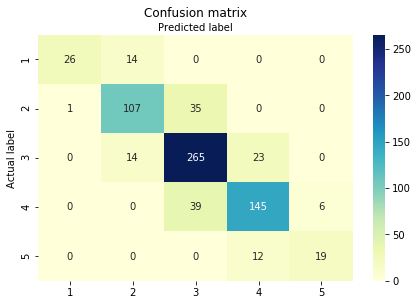

In [15]:
X, Y = getXY(fill_iter_impute)
model_lda = LDA()
lda_output = run_model(model_lda, X, Y)

Score for the model 0.6487252124645893
              precision    recall  f1-score   support

         1.0       0.46      0.30      0.36        40
         2.0       0.62      0.64      0.63       143
         3.0       0.72      0.78      0.75       302
         4.0       0.71      0.51      0.59       190
         5.0       0.32      0.68      0.44        31

   micro avg       0.65      0.65      0.65       706
   macro avg       0.57      0.58      0.55       706
weighted avg       0.66      0.65      0.65       706

Accuracy: 0.6487252124645893
Precision: 0.5658376489496343
Recall: 0.582161473602124


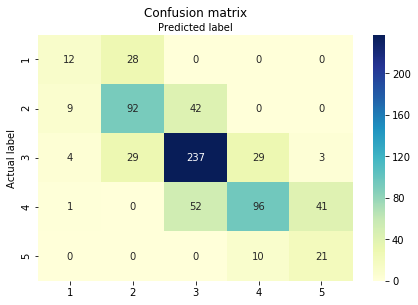

In [16]:
X, Y = getXY(fill_iter_impute)
model_qda = QDA()
qda_output = run_model(model_qda, X, Y, fit_only=True)

# KNN data

Score for the model 0.6572237960339944
              precision    recall  f1-score   support

         1.0       0.50      0.35      0.41        40
         2.0       0.63      0.63      0.63       143
         3.0       0.70      0.78      0.74       302
         4.0       0.71      0.55      0.62       190
         5.0       0.37      0.65      0.47        31

   micro avg       0.66      0.66      0.66       706
   macro avg       0.58      0.59      0.57       706
weighted avg       0.67      0.66      0.66       706

Accuracy: 0.6572237960339944
Precision: 0.5833094757609171
Recall: 0.590671458877645


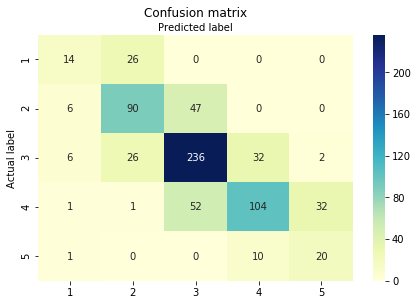

In [116]:
X, Y = getXY(fill_knn)
model_qda_knn = QDA()
model_qda_knn_output = run_model(model_qda_knn, X, Y, fit_only=True)

## Mean Data

Score for the model 0.660056657223796
              precision    recall  f1-score   support

           1       0.67      0.35      0.46        40
           2       0.61      0.63      0.62       143
           3       0.71      0.79      0.75       302
           4       0.73      0.53      0.61       190
           5       0.35      0.71      0.47        31

   micro avg       0.66      0.66      0.66       706
   macro avg       0.61      0.60      0.58       706
weighted avg       0.68      0.66      0.66       706

Accuracy: 0.660056657223796
Precision: 0.6143283766744904
Recall: 0.6020131649908238


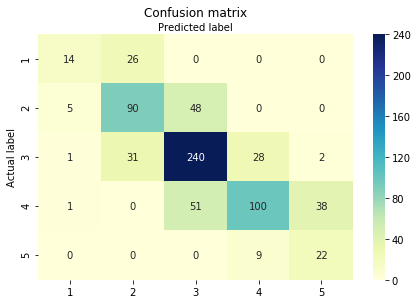

In [117]:
X, Y = getXY(fill_mean)
model_qda_mean = QDA()
model_qda_mean_output = run_model(model_qda_mean, X, Y, fit_only=True)

# Logistic Regression

## Imputate Data

In [18]:
from sklearn.linear_model import LogisticRegression

Score for the model 0.5963172804532578
              precision    recall  f1-score   support

         1.0       0.89      0.20      0.33        40
         2.0       0.52      0.24      0.33       143
         3.0       0.56      0.92      0.70       302
         4.0       0.74      0.46      0.57       190
         5.0       0.79      0.48      0.60        31

   micro avg       0.60      0.60      0.60       706
   macro avg       0.70      0.46      0.50       706
weighted avg       0.63      0.60      0.56       706

Accuracy: 0.5963172804532578
Precision: 0.6993399582873268
Recall: 0.45934929707852723


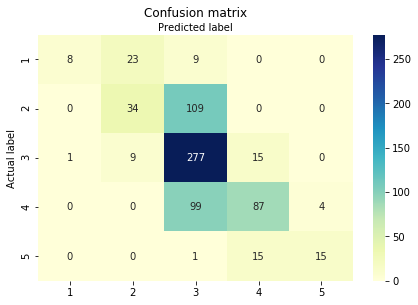

In [19]:
# solver='lbfgs','newton-cg' failed to converge
X, Y = getXY(fill_iter_impute)
model_logistic = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
# .fit(X,Y)
# model_logistic.predict(X_test)

logistic_impute = run_model(model_logistic, X, Y, fit_only=True)

## KNN Data

Score for the model 0.5934844192634561
              precision    recall  f1-score   support

         1.0       0.88      0.17      0.29        40
         2.0       0.52      0.24      0.33       143
         3.0       0.56      0.91      0.69       302
         4.0       0.73      0.47      0.57       190
         5.0       0.88      0.45      0.60        31

   micro avg       0.59      0.59      0.59       706
   macro avg       0.71      0.45      0.49       706
weighted avg       0.63      0.59      0.56       706

Accuracy: 0.5934844192634561
Precision: 0.7102679747632292
Recall: 0.44867844402193785


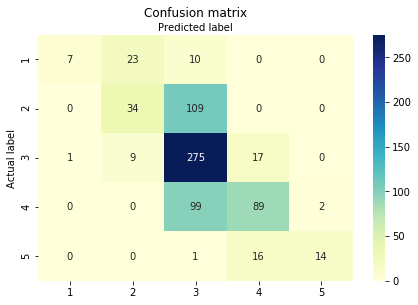

In [20]:
X, Y = getXY(fill_knn)
model_logistic_knn = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
logistic_knn = run_model(model_logistic_knn, X, Y, fit_only=True)

## Mean

Score for the model 0.5892351274787535
              precision    recall  f1-score   support

           1       0.80      0.20      0.32        40
           2       0.50      0.22      0.30       143
           3       0.55      0.91      0.69       302
           4       0.72      0.47      0.57       190
           5       0.88      0.45      0.60        31

   micro avg       0.59      0.59      0.59       706
   macro avg       0.69      0.45      0.49       706
weighted avg       0.62      0.59      0.55       706

Accuracy: 0.5892351274787535
Precision: 0.6904225178615423
Recall: 0.4488203881705045


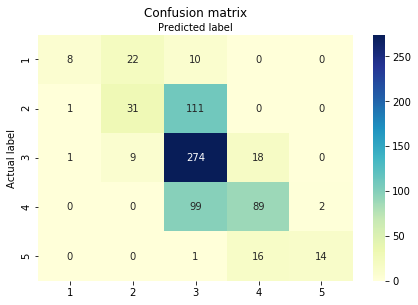

In [21]:
X, Y = getXY(fill_mean)
model_logistic_mean = LogisticRegression(solver='liblinear', fit_intercept=False,C=1000000,multi_class='auto', max_iter=1000)
logistic_mean = run_model(model_logistic_mean, X, Y, fit_only=True)

# GradientBoostingRegressor 

In [104]:
import matplotlib.pylab as plt
def regression_metrics(model, X, Y, plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model.fit(X_train,y_train)
#     print("******Score {0}".format(model.score())
    
#     plt.plot(model.staged_predict(X_test))
    y_pred_on_test_data = model.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_on_test_data)
    rmse_dt = mse_dt**(1/2)

    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
    MSE_CV_scores = - cross_val_score(model, X_train, y_train, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 

    # Compute the 10-folds CV RMSE
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)

    # Print RMSE_CV
    print('CV RMSE: {:.2f}'.format(RMSE_CV))
    if plot:
        plt.plot(model.train_score_)
        plt.show()
    if plot:
        plt.barh(model.feature_importances_, height=0.5, width=0.5)
        plt.show()
    return model

## Impute Data

In [105]:
X, Y = getXY_regression(fill_iter_impute)
model_gradient_impute = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
mod = regression_metrics(model_gradient_impute, X, Y, plot=False)

Test set RMSE of dt: 1.36
CV RMSE: 1.34


In [109]:
mod.feature_importances_

array([0.00399777, 0.00573056, 0.00432413, 0.00302048, 0.00272317,
       0.00384021, 0.00295483, 0.00341994, 0.00369525, 0.00339653,
       0.00273865, 0.00310959, 0.0039809 , 0.00400453, 0.00296434,
       0.0031052 , 0.0012107 , 0.00187784, 0.0026492 , 0.00374723,
       0.0080087 , 0.00167929, 0.00441103, 0.00206601, 0.00217348,
       0.00495614, 0.88297684, 0.00454004, 0.01841574, 0.00428169])

In [111]:
feature = pd.Series(mod.feature_importances_)

<BarContainer object of 30 artists>

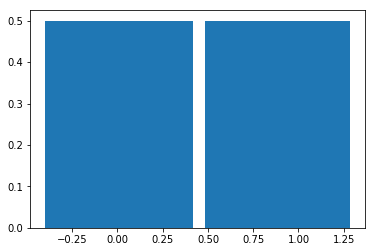

In [112]:
plt.bar(feature, height=0.5)

In [80]:
for i in range(1,10):
    print("*"*50," Max Depth: ",i )
    model_gradient_impute = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
    regression_metrics(model_gradient_impute, X, Y)

**************************************************  Max Depth:  1
Test set RMSE of dt: 1.29
CV RMSE: 1.31
**************************************************  Max Depth:  2
Test set RMSE of dt: 1.26
CV RMSE: 1.28
**************************************************  Max Depth:  3
Test set RMSE of dt: 1.25
CV RMSE: 1.27
**************************************************  Max Depth:  4
Test set RMSE of dt: 1.28
CV RMSE: 1.26
**************************************************  Max Depth:  5
Test set RMSE of dt: 1.28
CV RMSE: 1.27
**************************************************  Max Depth:  6
Test set RMSE of dt: 1.33
CV RMSE: 1.28
**************************************************  Max Depth:  7
Test set RMSE of dt: 1.33
CV RMSE: 1.29
**************************************************  Max Depth:  8
Test set RMSE of dt: 1.35
CV RMSE: 1.31
**************************************************  Max Depth:  9
Test set RMSE of dt: 1.36
CV RMSE: 1.34


## KNN data

In [81]:
X, Y = getXY_regression(fill_knn)

for i in range(1,10):
    print("*"*50,"KNN data Max Depth: ",i )
    model_gradient_knn = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0, loss='ls')
    regression_metrics(model_gradient_knn, X, Y)

************************************************** KNN data Max Depth:  1
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  2
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  3
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  4
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  5
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  6
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  7
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  8
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** KNN data Max Depth:  9
Test set RMSE 

## Mean data

In [79]:
X, Y = getXY_regression(fill_mean)
for i in range(1,10):
    print("*"*50,"Mean Data-  Max Depth: ",i )
    model_gradient_mean = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=i, random_state=0, loss='ls')
    regression_metrics(model_gradient_mean, X, Y)

************************************************** Mean Data-  Max Depth:  1
Test set RMSE of dt: 1.29
CV RMSE: 1.31
************************************************** Mean Data-  Max Depth:  2
Test set RMSE of dt: 1.26
CV RMSE: 1.28
************************************************** Mean Data-  Max Depth:  3
Test set RMSE of dt: 1.25
CV RMSE: 1.27
************************************************** Mean Data-  Max Depth:  4
Test set RMSE of dt: 1.28
CV RMSE: 1.26
************************************************** Mean Data-  Max Depth:  5
Test set RMSE of dt: 1.28
CV RMSE: 1.27
************************************************** Mean Data-  Max Depth:  6
Test set RMSE of dt: 1.33
CV RMSE: 1.28
************************************************** Mean Data-  Max Depth:  7
Test set RMSE of dt: 1.33
CV RMSE: 1.29
************************************************** Mean Data-  Max Depth:  8
Test set RMSE of dt: 1.35
CV RMSE: 1.31
************************************************** Mean Data-  M